#Correlation and simple regression

## 1. Simple Linear Regression

If the probabilistic relationship between two random variables is described in terms of the mean and variance of one random variable as a function of the value of the other variable, we have what is known as _regression analysis_. When the analysis is limited to lienar mean-value functions, it is called _linear regression_. In general, however, regression may be nonlinear. In some cases, nonlinear regression problems may be converted to linear ones by appropriate transoformation of the original variable

We essentially are trying to determine whether one variable (independent) may be used to predict the values of another variable (dependent). The simplest form of such a model is:

$Y_i = a + b X_i + e_i$

and 

$\hat{Y} = a + b X_i$


Where $e_i$ is the error term or residual of the regression line; $X_i$ and $Y_i$ are the observed indendent and dependent variables respectively; $\hat{Y_i}$ are the values _estimated_ from the regression line; $a$ and $b$ are the regression coefficients where $b$ is the _slope_ of the line and $a$ is the _y-intercept_. THe slope measures the amount $Y$ increases or decreases when $X$ increases or decreases by one unit. 

### How to fit this line

Given our _linear regression on X_:

$E( Y | X = x) = \alpha + \beta x$

We see here that our regression coeffecients $\alpha$ and $\beta$ are constants, and the variance of $Y$ may be independent or a function of $x$. We will consider the first case where $VAR(Y | x) = constant$ . There will be many such lines that fit through our data points, how do we select the 'best line'. It is simplest to achieve this by fitting a line that gives the least error, where the error is defined as the sum of the residuals between the individual data points, and the predicted point from the line. That is, we minimize the _sum of squared errors_:

$\Delta^2 = \sum_{i=1}^n (y_i - \hat{y_i})^2 = \sum_{i=1}^n (y_i - \alpha - \beta x_i)^2 $

The _sum of squared errors_ is the value that we use to quantify the error we get when we apply the line of estimation and compare it with our actual data points. Note that this value represents a measure on the vertical distance each or our measured data points are away from the predicted line, that is the residuals. For each data point, we have a _residual_, $e_i$. If we were to simply sum these _residual_ values, we'd have the same problem that we had when evaluating, or calculating our variance. That is, we'll have positive and negative residuals, so the sum could be $0$. We want to avoid this. We could use $ \sum_{i=1}^n |(y_i - \hat{y_i})|$, but this is not used in practice. In practice, statisticians work with the _squared errors_ or _squared residuals_.






Using linregress, the coefficients slope, intercept, r_value, p_value, and std_err are:
0.4299 -0.1248 0.8949 0.0000 0.0447
-----
using numpy.polyfit the coefficients are:
slope of the regression: 0.4299
intercept: -0.1248


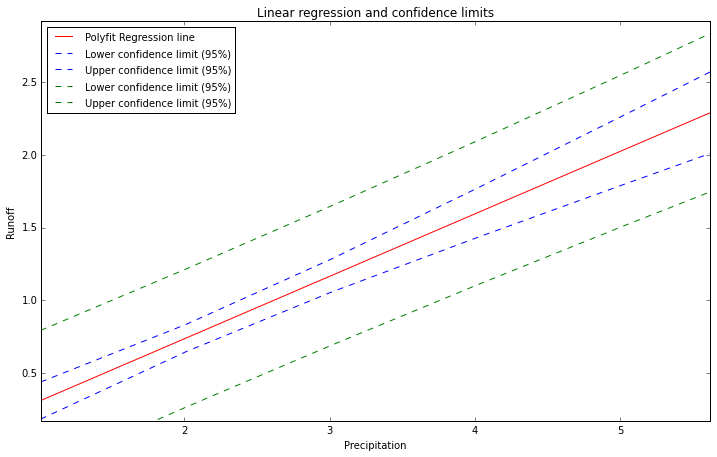

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Example 5.8 Ang & Tang
storm_no = range(1,26)
precip = np.array([float(i) for i in '1.11 1.17 1.79 5.62 1.13 1.54 3.19 1.73 2.09 2.75 1.20 1.01 1.64 1.57 1.54 2.09 3.54 1.17 1.15 2.57 3.57 5.11 1.52 2.93 1.16'.split(' ')] )
runoff = np.array([float(i) for i in '0.52 0.40 0.97 2.92 0.17 0.19 0.76 0.66 0.78 1.24 0.39 0.30 0.70 0.77 0.59 0.95 1.02 0.39 0.23 0.45 1.59 1.74 0.56 1.12 0.64'.split(' ')] )

# Method 1: linregress (scipy)
f, ax1 = plt.subplots(1, figsize=[12,8])
ax1.scatter(precip, runoff, label='runoff')
plt.xlabel('Precipitation, x, in.')
plt.ylabel('Runoff, y, in.')
plt.grid(True)

xmin = min(precip)
xmax = max(precip)
slope, intercept, r_value, p_value, std_err = linregress(precip, runoff)
ax1.plot([0, xmax], [intercept, slope * xmax + intercept], 'g-',\
         linewidth=3, label='linregress regression')


#fit = slope * x + intercept
#ax1.plot(x, fit, 'g-', label='linregress regression')

# Method 2: np.polyfit
# linfit.py - example of confidence limit calculation for linear regression fitting.
 
# References:
# - Statistics in Geography by David Ebdon (ISBN: 978-0631136880)
# - Reliability Engineering Resource Website:
# - http://www.weibull.com/DOEWeb/confidence_intervals_in_simple_linear_regression.htm
# - University of Glascow, Department of Statistics:
# - http://www.stats.gla.ac.uk/steps/glossary/confidence_intervals.html#conflim

x = precip
y = runoff
# fit a curve to the data using a least squares 1st order polynomial fit
z = np.polyfit(x,y,1)


p = np.poly1d(z)
fit = p(x)
 
# get the coordinates for the fit curve
c_y = [np.min(fit),np.max(fit)]
c_x = [np.min(x),np.max(x)]
 
# predict y values of origional data using the fit
p_y = z[0] * x + z[1]  #polyfit returns y=mx+b coefficients


# calculate the y-error (residuals)
y_err = y - p_y
#y_err = y - fit

# create series of new test x-values to predict for
p_x = np.arange(np.min(x),np.max(x)+1,1)
 
# now calculate confidence intervals for new test x-series
mean_x = np.mean(x)         # mean of x
n = len(x)              # number of samples in origional fit
t = 1.708 #2.31                # appropriate t value (where n=9, two tailed 95%)
s_err = np.sum(np.power(y_err,2))   # sum of the squares of the residuals
 
confs = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((p_x-mean_x),2)/
            ((np.sum(np.power(x,2)))-n*(np.power(mean_x,2))))))
 
confi = t * np.sqrt((s_err/(n-2))*(1+1.0/n + (np.power((p_x-mean_x),2)/
            ((np.sum(np.power(x,2)))-n*(np.power(mean_x,2))))))

    # now predict y based on test x-values
p_y = z[0]*p_x+z[1]
#p_y = p(p_x)

# get lower and upper confidence limits based on predicted y and confidence intervals
lower = p_y - abs(confs)
upper = p_y + abs(confs)
loweri = p_y - abs(confi)
upperi = p_y + abs(confi)
 
# set-up the plot
#f, ax1 = plt.subplots(1, figsize=[12,8])

plt.axes().set_aspect('equal')
plt.xlabel('Precipitation')
plt.ylabel('Runoff')
plt.title('Linear regression and confidence limits')
 
# plot sample data
#plt.plot(x,y,'bo',label='Sample observations')
 
# plot line of best fit
plt.plot(c_x,c_y,'r-',label='Polyfit Regression line')
 
# plot confidence limits
plt.plot(p_x,lower,'b--',label='Lower confidence limit (95%)')
plt.plot(p_x,upper,'b--',label='Upper confidence limit (95%)')

plt.plot(p_x,loweri,'g--',label='Lower confidence limit (95%)')
plt.plot(p_x,upperi,'g--',label='Upper confidence limit (95%)')

# set coordinate limits
plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))
 
# configure legend
plt.legend(loc=0)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10)



# print out some metadata
print "Using linregress, the coefficients slope, intercept, r_value, p_value, and std_err are:"
print("{0:.4f} {1:.4f} {2:.4f} {3:.4f} {4:.4f}".format(slope, intercept, r_value, p_value, std_err))
print '-----'
print "using numpy.polyfit the coefficients are:"
print "slope of the regression: {0:.4f}".format(z[0])
print "intercept: {0:.4f}".format(z[1])

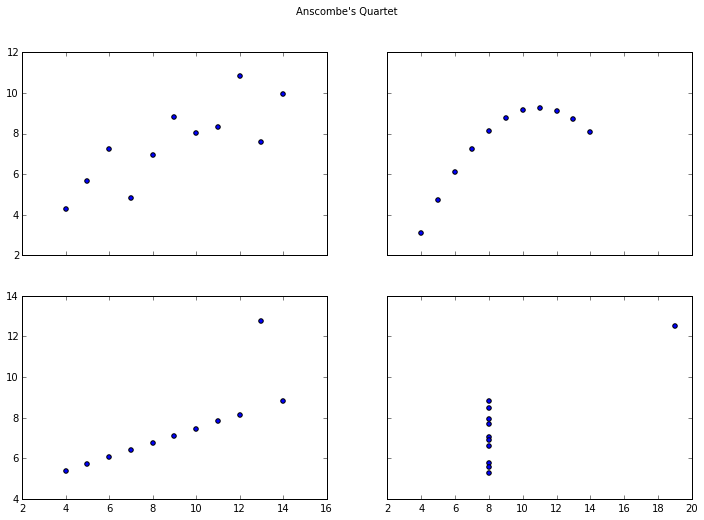

In [9]:
from scipy.stats import describe
import scipy.stats as stats

## From Tufte, p.14; F.J.Anscombe, "Graphs in Statistical Analysis", American Statistician, 27 (Feb. 1973), 17-21
# "Anscombe's Quadruple"
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
 
x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]
 
x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]
 
x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]


f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=[12,8])
ax1.scatter(x1, y1)
ax2.scatter(x2, y2)
ax3.scatter(x3, y3)
ax4.scatter(x4, y4)

plt.suptitle("Anscombe's Quartet")



0.500 3.00 0.816 0.002 0.118
0.500 3.00 0.816 0.002 0.118
0.500 3.00 0.816 0.002 0.118
0.500 3.00 0.816 0.002 0.118


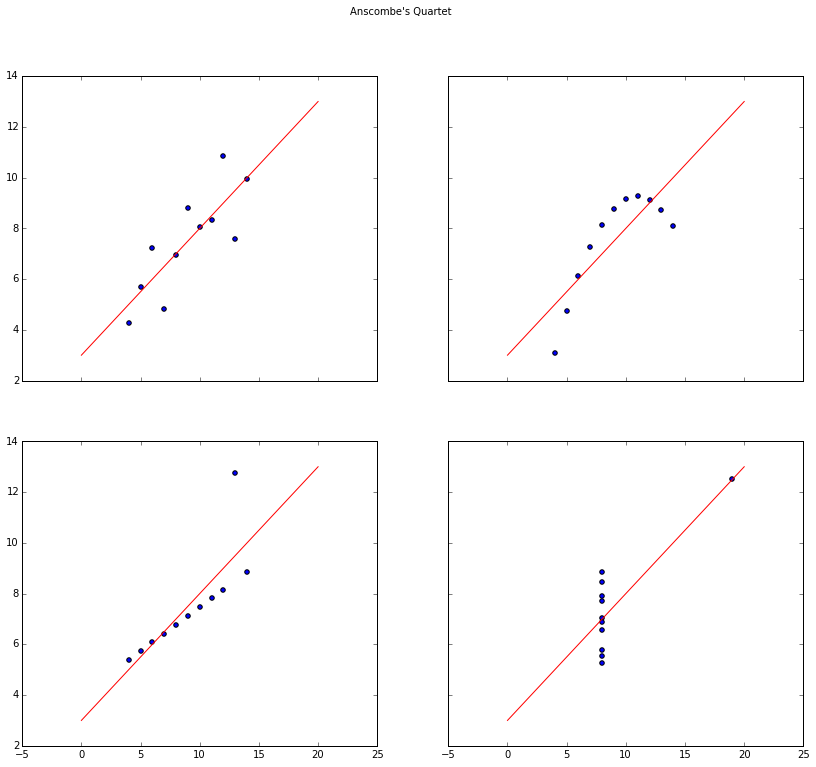

In [10]:
# -*- coding: utf-8 -*-
"""
Demo of Anscombe's quartet in Python
original source: https://gist.github.com/endolith/3299951
 
Prints the return values from linregress to show that they're all identical
 
https://en.wikipedia.org/wiki/Anscombe's_quartet
"""
 
from matplotlib.pyplot import subplot, scatter, plot, axis
from scipy.stats import linregress
 
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
 
x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]
 
x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]
 
x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
 
xmax = 20
ymax = 14
 
    
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=[14,12])
ax1.scatter(x1, y1)
ax2.scatter(x2, y2)
ax3.scatter(x3, y3)
ax4.scatter(x4, y4)

plt.suptitle("Anscombe's Quartet")

for i in range(4):
    v = i+1
    slope, intercept, r_value, p_value, std_err = linregress(x1, y1)
    exec("ax{0}.plot([0, xmax], [intercept, slope * xmax + intercept], 'r-')".format(v))
    
    print("{0:.3f} {1:.2f} {2:.3f} {3:.3f} {4:.3f}".format(slope, intercept, r_value, p_value, std_err))
 


In [19]:
from scipy.stats import describe as desc

for i in [y1, y2, y3, y4]:
    print("mean :", np.around(np.mean(i), decimals=1))
    print(desc(i))

('mean :', 7.5)
DescribeResult(nobs=11, minmax=(4.2599999999999998, 10.84), mean=7.5009090909090927, variance=4.127269090909091, skewness=-0.05580806588592382, kurtosis=-0.820938640623643)
('mean :', 7.5)
DescribeResult(nobs=11, minmax=(3.1000000000000001, 9.2599999999999998), mean=7.5009090909090901, variance=4.1276290909090907, skewness=-1.1291080017166912, kurtosis=0.007673939693123799)
('mean :', 7.5)
DescribeResult(nobs=11, minmax=(5.3899999999999997, 12.74), mean=7.5, variance=4.1226200000000004, skewness=1.592230735816442, kurtosis=2.1304531678390655)
('mean :', 7.5)
DescribeResult(nobs=11, minmax=(5.25, 12.5), mean=7.500909090909091, variance=4.1232490909090913, skewness=1.2930252896378598, kurtosis=1.3907889537777125)
